In [1]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
winedata_df = pd.read_csv(os.path.join("resources","winedata.csv"))
winedata_df.head()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# pre_y = winedata_df["type"]
# lab = preprocessing.LabelEncoder()
# y= lab.fit_transform(pre_y)
# notypedf = winedata_df.drop(columns=['type'])

normalized = normalize(winedata_df)
normalized[:1]

array([[9.32148040e-04, 1.32644666e-02, 1.59397315e-03, 2.26511974e-03,
        1.45415094e-02, 1.18382801e-01, 2.61001451e-03, 2.85237300e-03,
        2.61001451e-04, 2.13461901e-03, 5.25731494e-03, 9.69433961e-04,
        3.65402032e-03, 9.92737662e-01]])

In [4]:
df2 = pd.DataFrame(normalized)
df2.head()
# df2.columns = winedata_df.columns
# df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000948,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
3,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752


In [5]:
df2.columns = winedata_df.columns
df2.head()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000948,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
3,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752


In [6]:
mergings = linkage(normalized, method='ward')

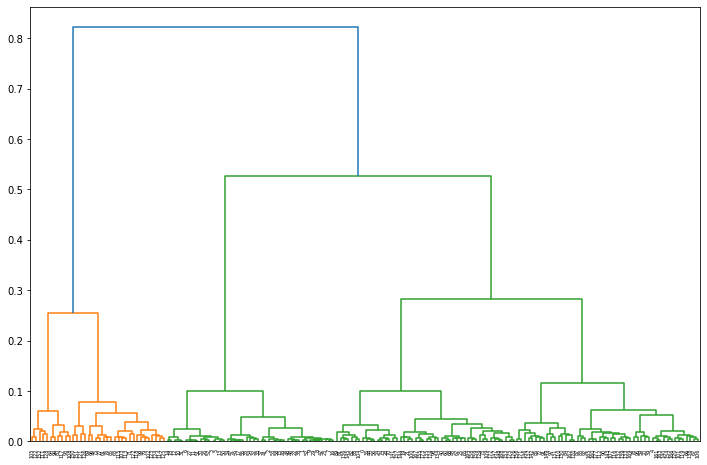

In [7]:
plt.figure(figsize=(12,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

In [11]:
cluster = AgglomerativeClustering(n_clusters=3,
                                  affinity='euclidean',
                                  linkage='ward')
labels = cluster.fit_predict(df2)

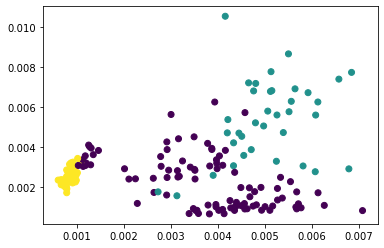

In [12]:
plt.scatter(df2['type'], df2['flavanoids'], c=labels)
plt.show()

In [13]:
df3 = winedata_df.drop(columns=['type'])
#scale data
scaler = StandardScaler()
scaleddata = scaler.fit_transform(df3[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols","proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]])
scaleddata
scaleddata_df = pd.DataFrame(scaleddata, columns=df3.columns)
scaleddata_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
scaled_pca = pca.fit_transform(scaleddata_df)

In [15]:
pcadf = pd.DataFrame(data=scaled_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4","PCA5", "PCA6", "PCA7", "PCA8"])
pcadf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


In [16]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749])

In [17]:
from sklearn.manifold import TSNE
#create new df for TSNE
df4 = winedata_df.drop(['type'], axis=1)
labels = winedata_df['type']
#initialize TSNE model
tsne = TSNE(learning_rate = 75)
#reduce dimensions
tsne_features = tsne.fit_transform(pcadf)
tsne_features.shape

C:\Users\allie\anaconda33\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(178, 2)

C:\Users\allie\anaconda33\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


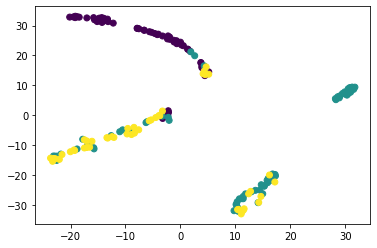

In [23]:
labels = winedata_df['type']
#initialize TSNE model
tsne = TSNE(learning_rate = 'auto', perplexity=11)
#reduce dimensions
tsne_features = tsne.fit_transform(winedata_df)
tsne_features.shape
winedata_df['x'] = tsne_features[:,0]
winedata_df['y'] = tsne_features[:,1]
plt.scatter(winedata_df['x'], winedata_df['y'], c=winedata_df['type'])
plt.show()

In [24]:
#model data using 10 clusters for the 10 columns 
model = KMeans(n_clusters=3, random_state=1)
#train model
model.fit(pcadf)
#predict clusters
predictions = model.predict(pcadf)
#create return df with predicted clusters
pcadf["class"] = model.labels_
pcadf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0


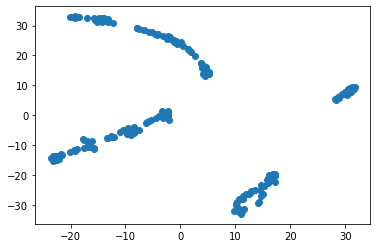

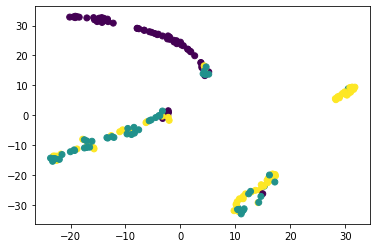

In [27]:
pcadf['x'] = tsne_features[:,0]
pcadf['y'] = tsne_features[:,1]
plt.scatter(pcadf['x'], pcadf['y'])
plt.show()
plt.scatter(pcadf['x'], pcadf['y'], c=pcadf["class"])
plt.show()